<a href="https://colab.research.google.com/github/ashvinim/Training/blob/main/my_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

#!pip list

In [2]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [17]:
# Pick a manual seed for randomization
torch.manual_seed(12)

# Create an instance of model
model = Model()

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
#url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [20]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [22]:
# Change last column from strings to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1)
my_df['variety'] = my_df['variety'].replace('Virginica', 2)
pd.set_option('future.no_silent_downcasting', True)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [23]:
# Train Test Split!  Set X, y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

# Convert these to numpy arrays
X = X.values
y = y.values

y = np.array([int(x) for x in y])

In [26]:
from sklearn.model_selection import train_test_split
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()

# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [27]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1439192295074463
Epoch: 10 and loss: 0.9617798924446106
Epoch: 20 and loss: 0.7485738396644592
Epoch: 30 and loss: 0.5297479033470154
Epoch: 40 and loss: 0.28468644618988037
Epoch: 50 and loss: 0.13855554163455963
Epoch: 60 and loss: 0.08598728477954865
Epoch: 70 and loss: 0.06986458599567413
Epoch: 80 and loss: 0.06374938040971756
Epoch: 90 and loss: 0.06059713289141655


Text(0.5, 0, 'Epoch')

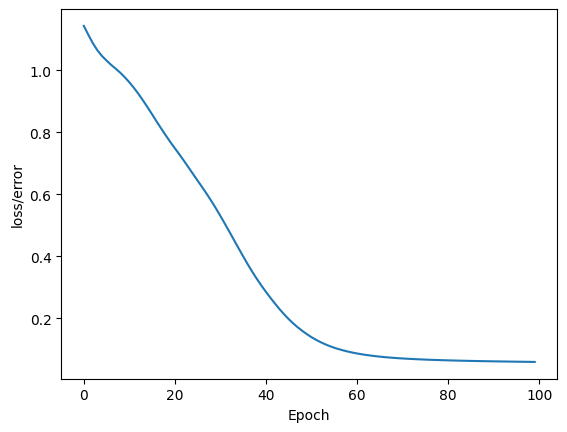

In [28]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [29]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [30]:
loss

tensor(0.0560)

In [31]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')


1.)  tensor([  9.0703,   1.7098, -10.4470]) 	 0 	 0
2.)  tensor([-4.7990, -0.5116,  4.1973]) 	 2 	 2
3.)  tensor([ 7.7257,  1.6467, -9.0341]) 	 0 	 0
4.)  tensor([-1.7829,  5.0210, -1.2910]) 	 1 	 1
5.)  tensor([-5.7872, -2.2030,  5.9415]) 	 2 	 2
6.)  tensor([-4.6265,  0.1211,  3.7074]) 	 2 	 2
7.)  tensor([-5.3453, -1.2063,  5.0341]) 	 2 	 2
8.)  tensor([  8.8738,   1.7419, -10.2653]) 	 0 	 0
9.)  tensor([-5.9094, -1.6374,  5.7460]) 	 2 	 2
10.)  tensor([ 7.1342,  2.4267, -8.8841]) 	 0 	 0
11.)  tensor([-2.8150,  3.0934,  0.6050]) 	 1 	 1
12.)  tensor([  9.9783,   1.7870, -11.4210]) 	 0 	 0
13.)  tensor([  8.5245,   2.0959, -10.1156]) 	 0 	 0
14.)  tensor([  8.7483,   1.9826, -10.2754]) 	 0 	 0
15.)  tensor([-1.2780,  6.0696, -2.3781]) 	 1 	 1
16.)  tensor([-4.7187,  0.4722,  3.5995]) 	 2 	 2
17.)  tensor([-5.3362, -1.9235,  5.3953]) 	 2 	 2
18.)  tensor([-2.0781,  4.8158, -0.9171]) 	 1 	 1
19.)  tensor([ 8.1536,  1.7879, -9.5528]) 	 0 	 0
20.)  tensor([-3.6251,  1.6673,  2.0433]) 	 

In [32]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [33]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 8.4782,  1.6107, -9.7835])


In [34]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [35]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-4.3788,  0.2409,  3.4347])


In [36]:
# Save our NN Model
torch.save(model.state_dict(), 'my_really_awesome_iris_model.pt')

In [37]:
# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))

<All keys matched successfully>

In [47]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [48]:
new_iris_1 = torch.tensor([1.1, 2.2, 3.3, 4.4])

In [49]:
with torch.no_grad():
  print(new_model(new_iris_1))

tensor([-5.1793, -3.7948,  6.2355])
